In [24]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn import metrics
plt.style.use('ggplot')
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [25]:
#Data Preparation Copy 54 Modified 0 Own 70
#--------------------------------------------------------------------------------------------
#C0 M0 O5
#Raw data
raw = pd.read_csv("/Users/mohitr/Downloads/car_insurance_claim.csv")
raw.shape
raw.head()
list(raw)
print(str(raw))

              ID  KIDSDRIV    BIRTH   AGE  HOMEKIDS   YOJ    INCOME PARENT1  \
0       63581743         0  16MAR39  60.0         0  11.0   $67,349      No   
1      132761049         0  21JAN56  43.0         0  11.0   $91,449      No   
2      921317019         0  18NOV51  48.0         0  11.0   $52,881      No   
3      727598473         0  05MAR64  35.0         1  10.0   $16,039      No   
4      450221861         0  05JUN48  51.0         0  14.0       NaN      No   
...          ...       ...      ...   ...       ...   ...       ...     ...   
10297   67790126         1  13AUG54  45.0         2   9.0  $164,669      No   
10298   61970712         0  17JUN53  46.0         0   9.0  $107,204      No   
10299  849208064         0  18JUN51  48.0         0  15.0   $39,837      No   
10300  627828331         0  12DEC48  50.0         0   7.0   $43,445      No   
10301  680381960         0  27FEB47  52.0         0  11.0   $53,235      No   

       HOME_VAL MSTATUS  ...     CAR_TYPE RED_CAR O

In [26]:
#C0 M0 O5
#Drop repeating and useless columns
df = raw.drop(['ID','BIRTH','OCCUPATION','CAR_TYPE','CLAIM_FLAG'], axis=1)
#Convert all the 'No' ,'Female' ,'Private' and 'Rural' categpries into numberic values(0).
df = df.replace(['No', 'z_No', 'no', 'z_F', 'Private', 'z_Highly Rural/ Rural'], 
                     [0, 0, 0, 0, 0, 0]) 
#Convert all the 'Yes' ,'Male' ,'Commerical' and 'Urban' categpries into numberic values(1).
df = df.replace(['Yes', 'yes', 'M', 'Commercial', 'Highly Urban/ Urban'], 
                     [1, 1, 1, 1, 1]) 
#Convert the education level into numberic values(0-3).
df = df.replace(['z_High School', '<High School', 'Bachelors', 'Masters', 'PhD'], 
                     [0, 0, 1, 2, 3]) 
df.dtypes

KIDSDRIV        int64
AGE           float64
HOMEKIDS        int64
YOJ           float64
INCOME         object
PARENT1         int64
HOME_VAL       object
MSTATUS         int64
GENDER          int64
EDUCATION       int64
TRAVTIME        int64
CAR_USE         int64
BLUEBOOK       object
TIF             int64
RED_CAR         int64
OLDCLAIM       object
CLM_FREQ        int64
REVOKED         int64
MVR_PTS         int64
CLM_AMT        object
CAR_AGE       float64
URBANICITY      int64
dtype: object

In [27]:
#C0 M0 O8
#Convert 'object' and 'float' columns into dtype'int'.
df[df.columns[4]]=df[df.columns[4]].replace('[\$,]', '', regex=True).astype(float)
df[df.columns[6]]=df[df.columns[6]].replace('[\$,]', '', regex=True).astype(float)
df[df.columns[12]]=df[df.columns[12]].replace('[\$,]', '', regex=True).astype(float)
df[df.columns[15]]=df[df.columns[15]].replace('[\$,]', '', regex=True).astype(float)
df[df.columns[19]]=df[df.columns[19]].replace('[\$,]', '', regex=True).astype(float)
df[df.columns[0:23]]=df[df.columns[0:23]].astype(float)
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10302 entries, 0 to 10301
Data columns (total 22 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   KIDSDRIV    10302 non-null  float64
 1   AGE         10295 non-null  float64
 2   HOMEKIDS    10302 non-null  float64
 3   YOJ         9754 non-null   float64
 4   INCOME      9732 non-null   float64
 5   PARENT1     10302 non-null  float64
 6   HOME_VAL    9727 non-null   float64
 7   MSTATUS     10302 non-null  float64
 8   GENDER      10302 non-null  float64
 9   EDUCATION   10302 non-null  float64
 10  TRAVTIME    10302 non-null  float64
 11  CAR_USE     10302 non-null  float64
 12  BLUEBOOK    10302 non-null  float64
 13  TIF         10302 non-null  float64
 14  RED_CAR     10302 non-null  float64
 15  OLDCLAIM    10302 non-null  float64
 16  CLM_FREQ    10302 non-null  float64
 17  REVOKED     10302 non-null  float64
 18  MVR_PTS     10302 non-null  float64
 19  CLM_AMT     10302 non-nul

Mean                   : 1511.2664531158998
Median                 : 0.0
Minimum                : 0.0
Maximum                : 123247.0
25th percentile of arr : 0.0
50th percentile of arr : 0.0
75th percentile of arr : 1144.75


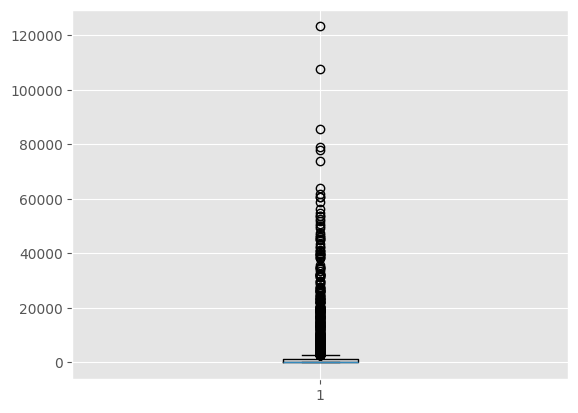

In [28]:
#C0 M0 O12
#Define a structure function for showing mean, median, min, max and percentile.
def structure(x):
    
    print("Mean                   :", x.mean())
    print("Median                 :", x.median())
    print("Minimum                :", x.min())
    print("Maximum                :", x.max())
    print("25th percentile of arr :", 
       np.percentile(x, 25)) 
    print("50th percentile of arr :",  
       np.percentile(x, 50)) 
    print("75th percentile of arr :", 
       np.percentile(x, 75))

#C0 M0 O4
#Structure of Claim Amount Data
clmamt = df.loc[:,('CLM_AMT')]
structure(clmamt)
plt.boxplot(clmamt)
plt.show()

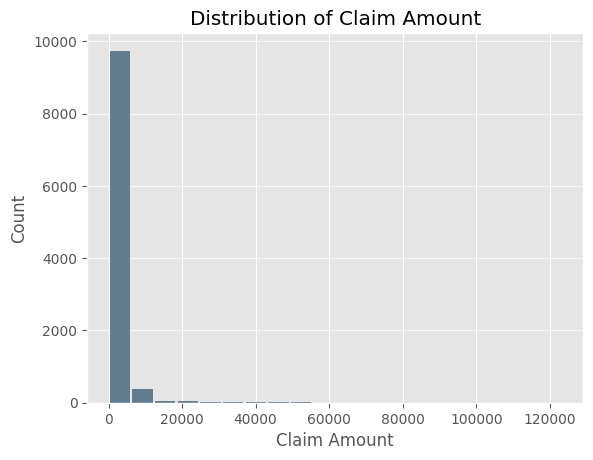

In [29]:
#C0 M0 O6
#Distribution of the claim amount
clmamt.plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#607c8e')
plt.title('Distribution of Claim Amount')
plt.xlabel('Claim Amount')
plt.ylabel('Count')
plt.grid(axis='y', alpha=0.75)
plt.show()

In [30]:
#C0 M0 O3
#Remove outliers
df1w = df[df.CLM_AMT<10000]
df1w.to_csv('df1w.csv')
df1w.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10106 entries, 0 to 10301
Data columns (total 22 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   KIDSDRIV    10106 non-null  float64
 1   AGE         10099 non-null  float64
 2   HOMEKIDS    10106 non-null  float64
 3   YOJ         9571 non-null   float64
 4   INCOME      9544 non-null   float64
 5   PARENT1     10106 non-null  float64
 6   HOME_VAL    9549 non-null   float64
 7   MSTATUS     10106 non-null  float64
 8   GENDER      10106 non-null  float64
 9   EDUCATION   10106 non-null  float64
 10  TRAVTIME    10106 non-null  float64
 11  CAR_USE     10106 non-null  float64
 12  BLUEBOOK    10106 non-null  float64
 13  TIF         10106 non-null  float64
 14  RED_CAR     10106 non-null  float64
 15  OLDCLAIM    10106 non-null  float64
 16  CLM_FREQ    10106 non-null  float64
 17  REVOKED     10106 non-null  float64
 18  MVR_PTS     10106 non-null  float64
 19  CLM_AMT     10106 non-null  fl

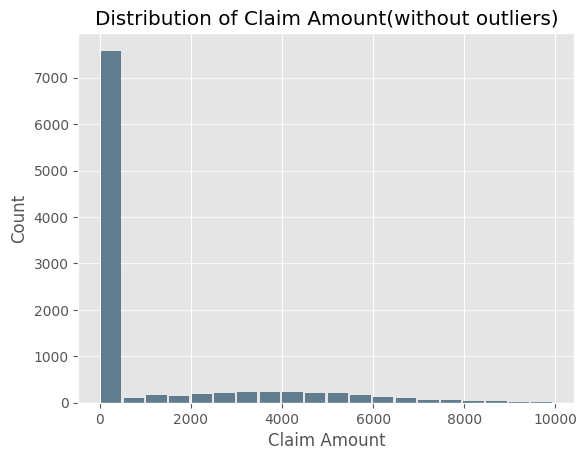

In [31]:
#C0 M0 O7
#Distribution of the claim amount(after removing outliers)
df1w.loc[:,('CLM_AMT')].plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#607c8e')
plt.title('Distribution of Claim Amount(without outliers)')
plt.xlabel('Claim Amount')
plt.ylabel('Count')
plt.grid(axis='y', alpha=0.75)

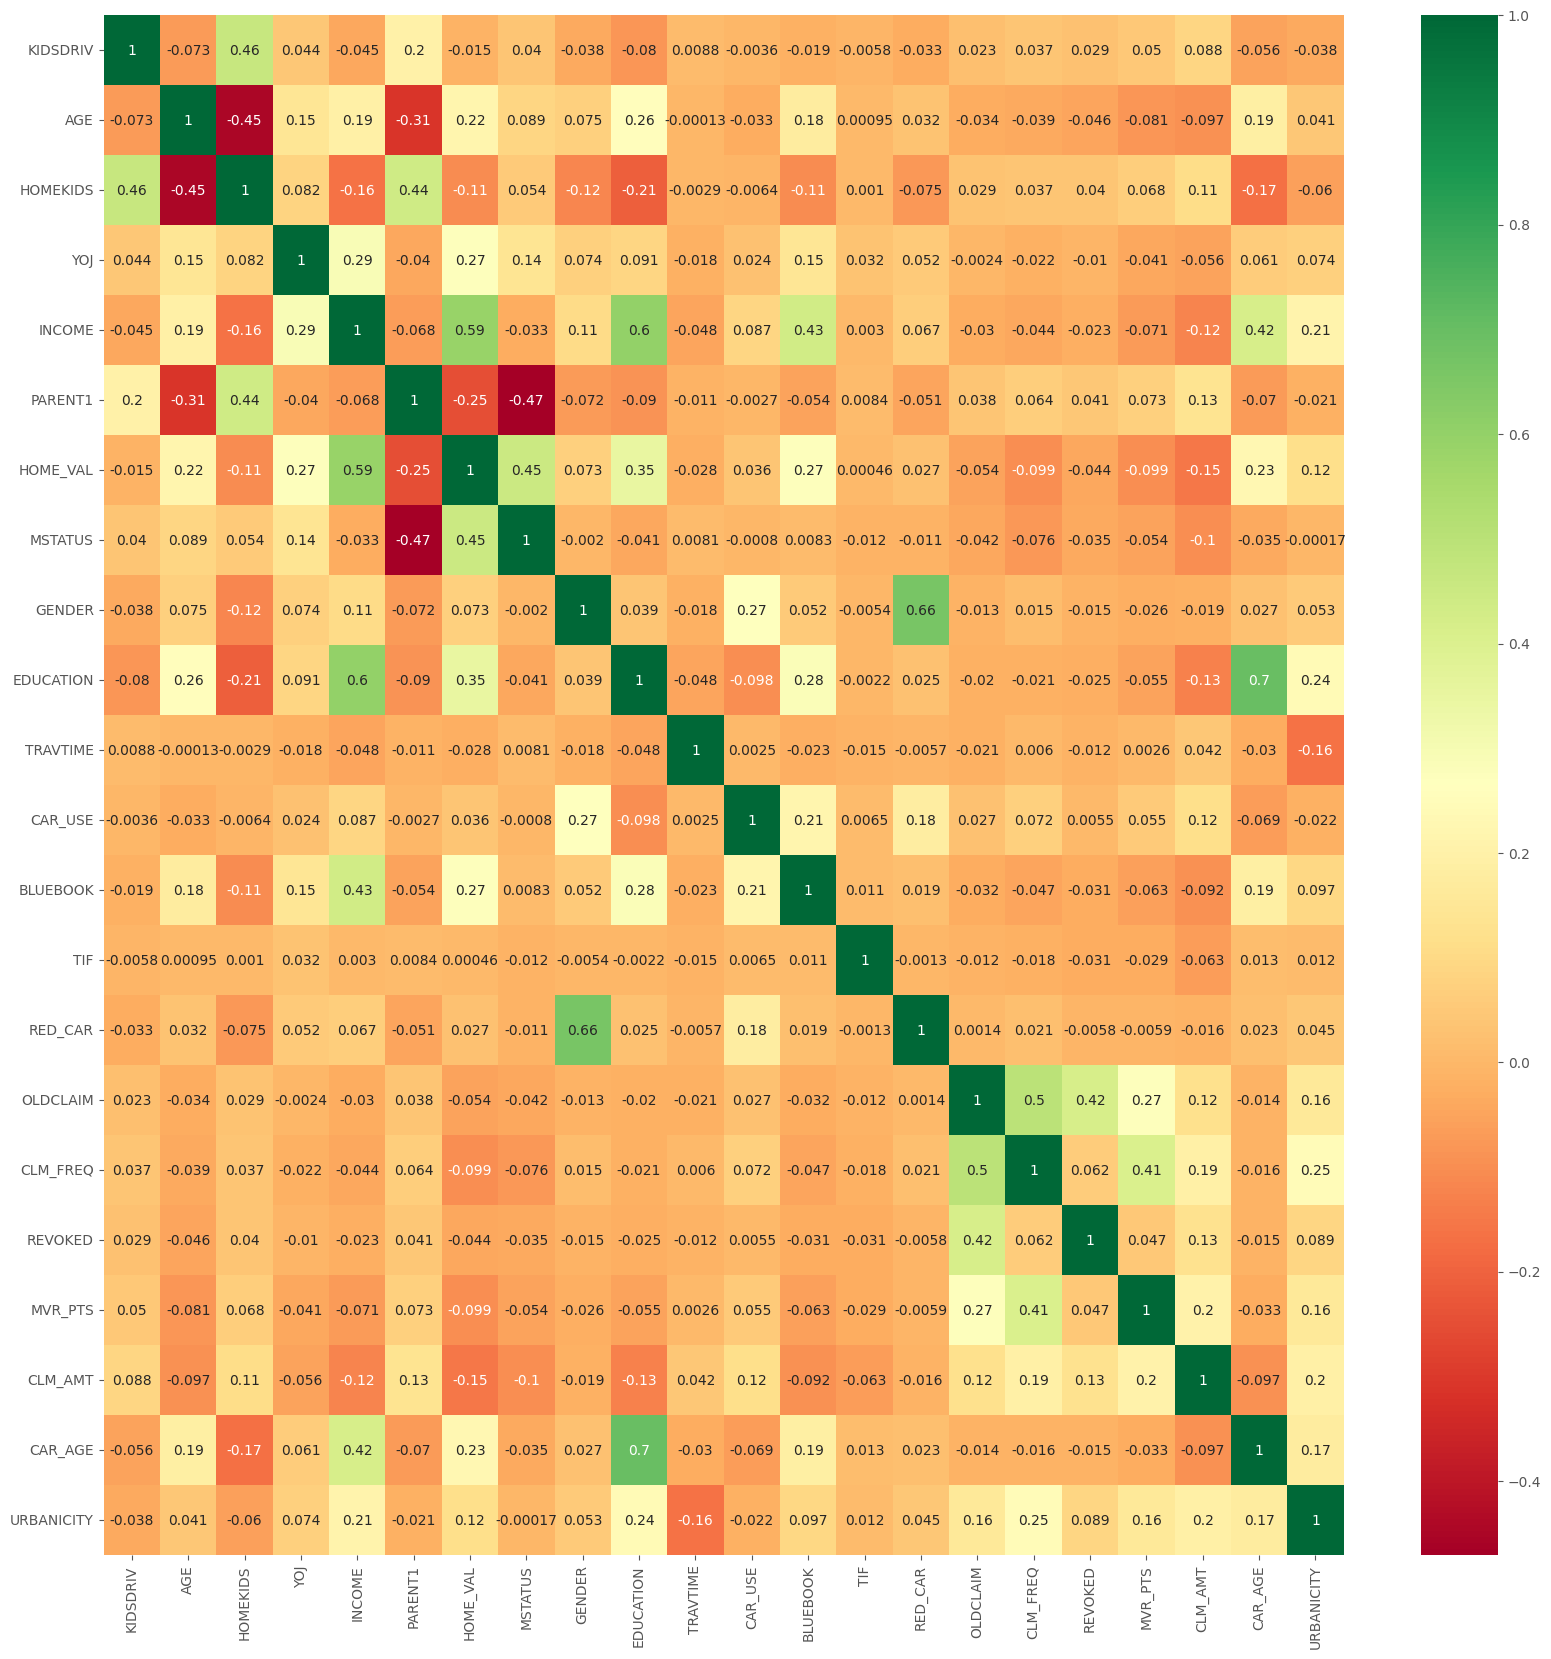

In [32]:
#C5 M2 O4
#Correlaton plot
#X = df.loc[:, ('KIDSDRIV','AGE','HOMEKIDS','YOJ','INCOME','PARENT1','HOME_VAL','MSTATUS','GENDER','EDUCATION',
#               'TRAVTIME','CAR_USE','BLUEBOOK','RED_CAR','OLDCLAIM','CLM_FREQ','REVOKED','MVR_PTS',
#               'CAR_AGE','CLAIM_FLAG','URBANICITY','CLM_AMT')]  #independent columns
def corrplt(df,col):
    X = df.loc[:, (list(df1w))]  #independent columns
    y = df.loc[:,(col)]    #target column
    #get correlations of each features in dataset
    corrmat = df.corr()
    top_corr_features = corrmat.index
    plt.figure(figsize=(20,20))
    #plot heat map
    g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")
    plt.savefig('Corr.png')
corrplt(df1w.dropna(),'CLM_AMT')

[0.02552359 0.09362037 0.03846465 0.07559191 0.08271473 0.01116167
 0.06856089 0.01637885 0.02472111 0.0381547  0.08945494 0.02103887
 0.09185737 0.02267785 0.05747954 0.05322126 0.0181571  0.07574544
 0.07116287 0.02431228]


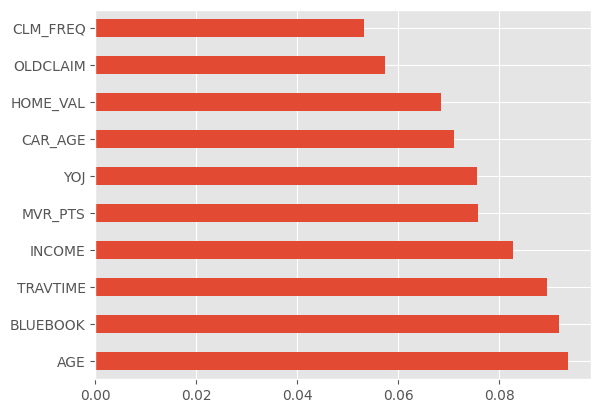

In [33]:
#Feature Selection
#C12 M5 O3
def decisiontree(df,col):
    X = df.loc[:, ('KIDSDRIV','AGE','HOMEKIDS','YOJ','INCOME','PARENT1','HOME_VAL','MSTATUS','GENDER','EDUCATION',
                   'TRAVTIME','CAR_USE','BLUEBOOK','RED_CAR','OLDCLAIM','CLM_FREQ','REVOKED','MVR_PTS','CAR_AGE',
                   'URBANICITY')]  #independent columns
    y = df.loc[:,(col)]    #target column
    from sklearn.ensemble import ExtraTreesClassifier
    import matplotlib.pyplot as plt
    model = ExtraTreesClassifier()
    model.fit(X,y)
    print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
    #plot graph of feature importances for better visualization
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    feat_importances.nlargest(10).plot(kind='barh')
    plt.savefig('DT.png')
    plt.show()
decisiontree(df1w.dropna(),'CLM_AMT')

In [34]:
#C0 M0 O2
#Select the top5 important features
top5 = df1w.loc[:,('BLUEBOOK','TRAVTIME','INCOME','MVR_PTS','AGE','CLM_AMT')]
#top5.info()
top5.dropna().info()
top5.dropna().head()

<class 'pandas.core.frame.DataFrame'>
Index: 9538 entries, 0 to 10301
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   BLUEBOOK  9538 non-null   float64
 1   TRAVTIME  9538 non-null   float64
 2   INCOME    9538 non-null   float64
 3   MVR_PTS   9538 non-null   float64
 4   AGE       9538 non-null   float64
 5   CLM_AMT   9538 non-null   float64
dtypes: float64(6)
memory usage: 521.6 KB


,BLUEBOOK,TRAVTIME,INCOME,MVR_PTS,AGE,CLM_AMT
0,14230.0,14.0,67349.0,3.0,60.0,0.0
1,14940.0,22.0,91449.0,0.0,43.0,0.0
2,21970.0,26.0,52881.0,2.0,48.0,0.0
3,4010.0,5.0,16039.0,3.0,35.0,0.0
5,18000.0,36.0,114986.0,3.0,50.0,0.0


In [35]:
# # Encode CLM_AMT and split Dataset
#C0 M0 O11
#CLM10 = top5dropna.loc[(top5dropna.CLM_AMT >= 0) , ['BLUEBOOK','TRAVTIME','INCOME','MVR_PTS','AGE','CLM_AMT']]
CLM10 = top5.dropna().loc[(top5.dropna().CLM_AMT >= 0) , ['BLUEBOOK','TRAVTIME','INCOME','MVR_PTS','AGE','CLM_AMT']]
CLM10.CLM_AMT[CLM10.CLM_AMT>0] = 1 
CLM10.head(10)

#The data of clients without claim.
CLM0 = CLM10.loc[(CLM10.CLM_AMT == 0) , ['BLUEBOOK','TRAVTIME','INCOME','MVR_PTS','AGE','CLM_AMT']]
CLM0.head()

#The data of clients with claim.
CLM1 = CLM10.loc[(CLM10.CLM_AMT > 0) , ['BLUEBOOK','TRAVTIME','INCOME','MVR_PTS','AGE','CLM_AMT']]
CLM1.head()

#The amount of clients with specific claim amount.
CLM1value = top5.dropna().loc[(top5.dropna().CLM_AMT>0), ['BLUEBOOK','TRAVTIME','INCOME','MVR_PTS','AGE','CLM_AMT']]
#Save the csv document for the following research
CLM1value.to_csv('CLM1value.csv')
CLM1value.info()
CLM1value.head(10)

<class 'pandas.core.frame.DataFrame'>
Index: 2413 entries, 6 to 10293
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   BLUEBOOK  2413 non-null   float64
 1   TRAVTIME  2413 non-null   float64
 2   INCOME    2413 non-null   float64
 3   MVR_PTS   2413 non-null   float64
 4   AGE       2413 non-null   float64
 5   CLM_AMT   2413 non-null   float64
dtypes: float64(6)
memory usage: 132.0 KB


,BLUEBOOK,TRAVTIME,INCOME,MVR_PTS,AGE,CLM_AMT
6,17430.0,46.0,125301.0,0.0,34.0,2946.0
8,18930.0,21.0,50815.0,2.0,40.0,6477.0
10,16970.0,44.0,107961.0,10.0,37.0,4021.0
11,11200.0,34.0,62978.0,0.0,34.0,2501.0
13,18300.0,15.0,77100.0,0.0,53.0,6077.0
16,28340.0,64.0,130795.0,3.0,53.0,1267.0
18,6000.0,48.0,0.0,3.0,45.0,2920.0
20,15420.0,45.0,87460.0,4.0,59.0,4111.0
24,8710.0,29.0,44077.0,0.0,28.0,6857.0
25,26560.0,52.0,37214.0,3.0,43.0,3627.0


In [36]:
#SVM
#--------------------------------------------------------------------------------------------
#C33 M4 O0
# encoding the features using get dummies
from sklearn.preprocessing import LabelEncoder
X_data = pd.get_dummies(CLM10.iloc[:,:-1])
X = X_data.values
# encoding the class with sklearn's LabelEncoder
Y_data = CLM10.values[:, -1]
class_le = LabelEncoder()
# fit and transform the class
y = class_le.fit_transform(Y_data)
# Spliting the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)
# perform training
# creating the classifier object
clf = SVC(kernel="linear")
X_train
y_train
# performing training
clf.fit(X_train, y_train)
# make predictions
# predicton on test
y_pred = clf.predict(X_test)
# calculate metrics
print("\n")
print("Classification Report: ")
print(classification_report(y_test,y_pred))
print("\n")
print("Accuracy : ", accuracy_score(y_test, y_pred) * 100)
print("\n")



Classification Report: 
              precision    recall  f1-score   support

           0       0.76      0.94      0.84      2135
           1       0.44      0.14      0.22       727

    accuracy                           0.74      2862
   macro avg       0.60      0.54      0.53      2862
weighted avg       0.68      0.74      0.68      2862



Accuracy :  73.58490566037736




[[-4.42057215e-02  1.01415172e+01 -1.13609612e-01  3.56642921e+02
  -2.78113309e+01]]


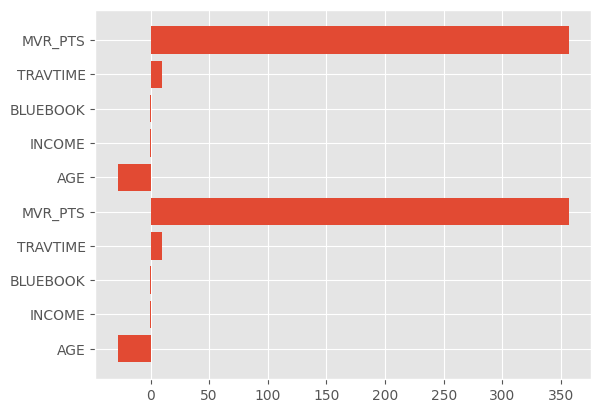

In [37]:
# function to display feature importance of the classifier
# here we will display top 20 features (top 10 max positive and negative coefficient values)
def coef_values(coef, names):
    imp = coef
    print(imp)
    imp,names = zip(*sorted(zip(imp.ravel(),names)))
    imp_pos_10 = imp[:]
    names_pos_10 = names[:]
    imp_neg_10 = imp[:]
    names_neg_10 = names[:]
    imp_top_20 = imp_neg_10+imp_pos_10
    names_top_20 =  names_neg_10+names_pos_10
    plt.barh(range(len(names_top_20)), imp_top_20, align='center')
    plt.yticks(range(len(names_top_20)), names_top_20)
    plt.show()
    
# get the column names
features_names = X_data.columns
# call the function
coef_values(clf.coef_, features_names)

In [38]:
#--------------------------------------------------------------------------------------------
#MLP Copy:77 Modified:15 Own:53
#--------------------------------------------------------------------------------------------
#Data Preparation
#import data
CLM1value=pd.read_csv("Clm1value.csv",index_col=[0])
CLM1value.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2413 entries, 6 to 10293
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   BLUEBOOK  2413 non-null   float64
 1   TRAVTIME  2413 non-null   float64
 2   INCOME    2413 non-null   float64
 3   MVR_PTS   2413 non-null   float64
 4   AGE       2413 non-null   float64
 5   CLM_AMT   2413 non-null   float64
dtypes: float64(6)
memory usage: 132.0 KB


In [39]:
#Dataframe Standerdization
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
dfTest = CLM1value
min_max_scaler = preprocessing.MinMaxScaler()
def scaleColumns(df, cols_to_scale):
    for col in cols_to_scale:
        df[col] = pd.DataFrame(min_max_scaler.fit_transform(pd.DataFrame(dfTest[col])),columns=[col])
    return df

In [40]:
#Standerdize 'BLUEBOOK','TRAVTIME','INCOME','MVR_PTS'.
clmstd = scaleColumns(CLM1value,list(CLM1value))
clmstd.head()
X = clmstd.dropna().iloc[:,:-1]
Y= clmstd.dropna().iloc[:, -1]

In [41]:
#indexing features and target
x1 = CLM1value.dropna().iloc[:,0:5]
y1 = CLM1value.dropna().iloc[:,[-1]]
print (x1.head())
print (y1.head())

    BLUEBOOK  TRAVTIME    INCOME   MVR_PTS       AGE
6   0.074086  0.467391  0.000000  0.230769  0.483333
8   0.118703  0.260870  0.137686  0.000000  0.200000
10  0.161179  0.119565  0.118515  0.000000  0.733333
11  0.140435  0.228261  0.097696  0.000000  0.266667
13  0.176655  0.163043  0.053070  1.000000  0.400000
     CLM_AMT
6   0.291478
8   0.688553
10  0.526172
11  0.449420
13  0.612204


In [42]:
from sklearn.model_selection import train_test_split
import random
random.seed(1234) #set seed for repeatable data
x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size=0.3)
#x_test1, x_val1, y_test1, y_val1 = train_test_split(x_test1, y_test1, test_size=0.5)
print(len(y_test.values))

174


In [43]:
#MLP Model Settle
from numpy import exp, array, random, dot
class NeuronLayer():
    def __init__(self, number_of_neurons, number_of_inputs_per_neuron):
        self.synaptic_weights = 2 * random.random((number_of_inputs_per_neuron, number_of_neurons)) - 1
class NeuralNetwork():
    def __init__(self, layer1, layer2):
        self.layer1 = layer1
        self.layer2 = layer2
    # The Sigmoid function, which describes an S shaped curve.
    # We pass the weighted sum of the inputs through this function to
    # normalise them between 0 and 1.
    def __sigmoid(self, x):
        return 1 / (1 + exp(-x))
    # The derivative of the Sigmoid function.
    # This is the gradient of the Sigmoid curve.
    # It indicates how confident we are about the existing weight.
    def __sigmoid_derivative(self, x):
        return x * (1 - x)
    # We train the neural network through a process of trial and error.
    # Adjusting the synaptic weights each time.
    def train(self, training_set_inputs, training_set_outputs, number_of_training_iterations):
        for iteration in range(number_of_training_iterations):
            # Pass the training set through our neural network
            output_from_layer_1, output_from_layer_2 = self.think(training_set_inputs)

            # Calculate the error for layer 2 (The difference between the desired output
            # and the predicted output).
            layer2_error = training_set_outputs - output_from_layer_2
            layer2_delta = layer2_error * self.__sigmoid_derivative(output_from_layer_2)

            # Calculate the error for layer 1 (By looking at the weights in layer 1,
            # we can determine by how much layer 1 contributed to the error in layer 2).
            layer1_error = layer2_delta.dot(self.layer2.synaptic_weights.T)
            layer1_delta = layer1_error * self.__sigmoid_derivative(output_from_layer_1)

            # Calculate how much to adjust the weights by
            layer1_adjustment = training_set_inputs.T.dot(layer1_delta)
            layer2_adjustment = output_from_layer_1.T.dot(layer2_delta)

            # Adjust the weights.
            self.layer1.synaptic_weights += layer1_adjustment
            self.layer2.synaptic_weights += layer2_adjustment
    # The neural network thinks.
    def think(self, inputs):
        output_from_layer1 = self.__sigmoid(dot(inputs, self.layer1.synaptic_weights))
        output_from_layer2 = self.__sigmoid(dot(output_from_layer1, self.layer2.synaptic_weights))
        return output_from_layer1, output_from_layer2
    # The neural network prints its weights
    def print_weights(self):
        print("    Layer 1 (3 neurons, each with 5 inputs):")
        print(self.layer1.synaptic_weights)
        print("    Layer 2 (1 neuron, with 3 inputs):")
        print(self.layer2.synaptic_weights)
if __name__ == "__main__":
    #Seed the random number generator
    random.seed(1)
    # Create layer 1 (3 neurons, each with 5 inputs)
    layer1 = NeuronLayer(3, 5)
    # Create layer 2 (a single neuron with 3 inputs)
    layer2 = NeuronLayer(1, 3)
    # Combine the layers to create a neural network
    neural_network = NeuralNetwork(layer1, layer2)
    print("Stage 1) Random starting synaptic weights: ")
    neural_network.print_weights()
    # The training set. We have 7 examples, each consisting of 3 input values
    # and 1 output value.
    training_set_inputs = x_train.values
    training_set_outputs = y_train.values
    # Train the neural network using the training set.
    # Do it 60,000 times and make small adjustments each time.
    neural_network.train(training_set_inputs, training_set_outputs, 5)
    print("Stage 2) New synaptic weights after training: ")
    neural_network.print_weights()
    # Test the neural network with a new situation.
    print("Stage 3) Considering a new situation [0.5482, 0.1739, 0.4240, 0., 0.7333] -> ?: ")
    hidden_state, output = neural_network.think(array([0.5482, 0.1739, 0.4240, 0., 0.7333]))
    print(output)

hidden_state1,predictions = neural_network.think(x_test.values)
neural_network.think(x_test.values)
hidden_state1
predictions
mse = metrics.mean_squared_error(y_test, predictions)
print ('MSE of Claim Amount: {:.3f}'.format(mse))

# # MSE Plots
def MSE(iterations,NNeurons):
    if __name__ == "__main__":
        #Seed the random number generator
        random.seed(1)
        # Create layer 1 (4 neurons, each with 3 inputs)
        layer1 = NeuronLayer(NNeurons, 5)
        # Create layer 2 (a single neuron with 4 inputs)
        layer2 = NeuronLayer(1, NNeurons)
        # Combine the layers to create a neural network
        neural_network = NeuralNetwork(layer1, layer2)
        #print("Stage 1) Random starting synaptic weights: ")
        neural_network.print_weights()
        # The training set. We have 7 examples, each consisting of 3 input values
        # and 1 output value.
        training_set_inputs = x_train.values
        training_set_outputs = y_train.values
        neural_network.train(training_set_inputs, training_set_outputs, iterations)
        neural_network.print_weights()
    hidden_state1,predictions = neural_network.think(x_test.values)
    mse = metrics.mean_squared_error(y_test, predictions)
    return mse

Stage 1) Random starting synaptic weights: 
    Layer 1 (3 neurons, each with 5 inputs):
[[-0.16595599  0.44064899 -0.99977125]
 [-0.39533485 -0.70648822 -0.81532281]
 [-0.62747958 -0.30887855 -0.20646505]
 [ 0.07763347 -0.16161097  0.370439  ]
 [-0.5910955   0.75623487 -0.94522481]]
    Layer 2 (1 neuron, with 3 inputs):
[[ 0.34093502]
 [-0.1653904 ]
 [ 0.11737966]]
Stage 2) New synaptic weights after training: 
    Layer 1 (3 neurons, each with 5 inputs):
[[-1.41870626 -1.76032112 -1.94744501]
 [-2.67693661 -4.54017158 -2.57917969]
 [-1.63726191 -2.05576855 -0.9880567 ]
 [-1.20382913 -2.25510437 -0.6797178 ]
 [-3.44910508 -4.13960683 -3.13552863]]
    Layer 2 (1 neuron, with 3 inputs):
[[-3.15647308]
 [-4.88579545]
 [-2.35454096]]
Stage 3) Considering a new situation [0.5482, 0.1739, 0.4240, 0., 0.7333] -> ?: 
[0.47841428]
MSE of Claim Amount: 0.054


    Layer 1 (3 neurons, each with 5 inputs):
[[-0.16595599]
 [ 0.44064899]
 [-0.99977125]
 [-0.39533485]
 [-0.70648822]]
    Layer 2 (1 neuron, with 3 inputs):
[[-0.81532281]]
    Layer 1 (3 neurons, each with 5 inputs):
[[-1.45440405]
 [-1.86657887]
 [-1.83485246]
 [-1.71906094]
 [-3.6105298 ]]
    Layer 2 (1 neuron, with 3 inputs):
[[-1.35407165]]
    Layer 1 (3 neurons, each with 5 inputs):
[[-0.16595599  0.44064899]
 [-0.99977125 -0.39533485]
 [-0.70648822 -0.81532281]
 [-0.62747958 -0.30887855]
 [-0.20646505  0.07763347]]
    Layer 2 (1 neuron, with 3 inputs):
[[-0.16161097]
 [ 0.370439  ]]
    Layer 1 (3 neurons, each with 5 inputs):
[[-1.26719348 -1.19017319]
 [-2.6782701  -2.92049741]
 [-1.40013014 -1.9470029 ]
 [-1.71692207 -1.85072607]
 [-2.50456787 -3.40896397]]
    Layer 2 (1 neuron, with 3 inputs):
[[-2.86262853]
 [-4.2985995 ]]
    Layer 1 (3 neurons, each with 5 inputs):
[[-0.16595599  0.44064899 -0.99977125]
 [-0.39533485 -0.70648822 -0.81532281]
 [-0.62747958 -0.308878

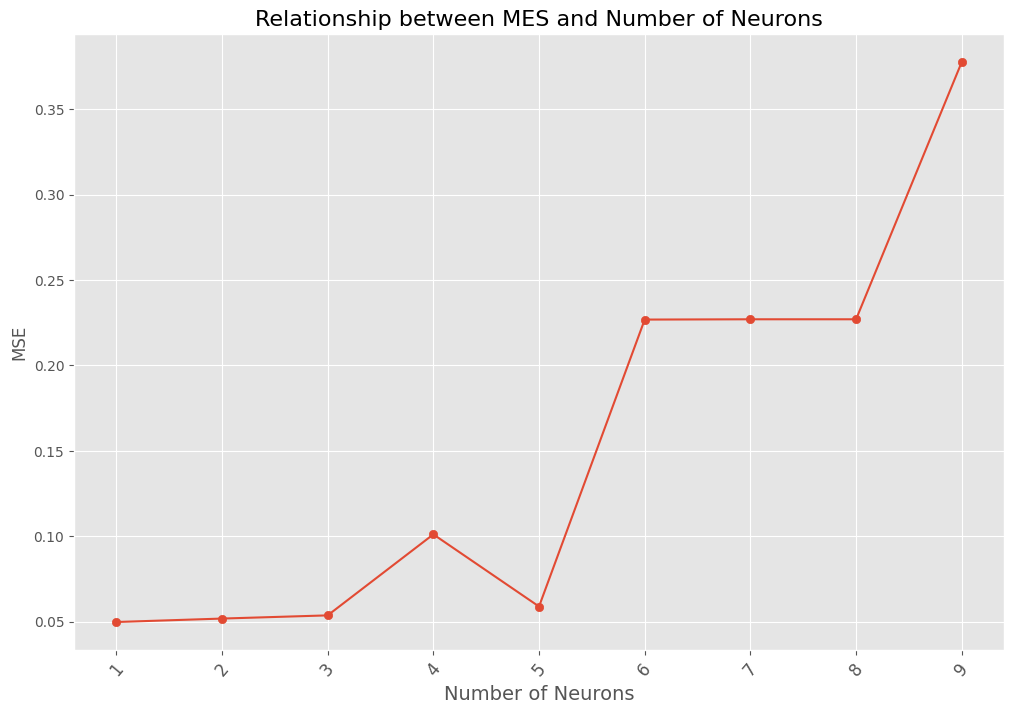

In [44]:
#MSE&Number of Neuron Plot with Fixed Epoch
def NNPLOT(min_,max_,steps,iterations):
    N=[]
    I=[]
    for i in range(min_,max_,steps):
        N.append(MSE(iterations,i))
        I.append(i)
    plt.figure(figsize=(12,8))
    plt.scatter(I,N)
    plt.plot(I,N)
    plt.title("Relationship between MES and Number of Neurons", fontsize=16)
    plt.xlabel("Number of Neurons", fontsize=14)
    plt.ylabel("MSE", fontsize=12)
    plt.xticks(rotation=50, fontsize=12)
    #Save the plots to folder
    plt.savefig("NNPLOT.png", bbox_inches='tight')
    plt.show()
NNPLOT(1, 10, 1, 5)

    Layer 1 (3 neurons, each with 5 inputs):
[[-0.16595599  0.44064899 -0.99977125]
 [-0.39533485 -0.70648822 -0.81532281]
 [-0.62747958 -0.30887855 -0.20646505]
 [ 0.07763347 -0.16161097  0.370439  ]
 [-0.5910955   0.75623487 -0.94522481]]
    Layer 2 (1 neuron, with 3 inputs):
[[ 0.34093502]
 [-0.1653904 ]
 [ 0.11737966]]
    Layer 1 (3 neurons, each with 5 inputs):
[[-0.36708351  0.54608995 -1.05888251]
 [-0.73145375 -0.53020285 -0.91609224]
 [-0.80773332 -0.2125626  -0.26066754]
 [-0.10775405 -0.06648165  0.31177541]
 [-1.07368679  1.00825482 -1.09046684]]
    Layer 2 (1 neuron, with 3 inputs):
[[-4.60705783]
 [-7.2439515 ]
 [-3.87549471]]
    Layer 1 (3 neurons, each with 5 inputs):
[[-0.16595599  0.44064899 -0.99977125]
 [-0.39533485 -0.70648822 -0.81532281]
 [-0.62747958 -0.30887855 -0.20646505]
 [ 0.07763347 -0.16161097  0.370439  ]
 [-0.5910955   0.75623487 -0.94522481]]
    Layer 2 (1 neuron, with 3 inputs):
[[ 0.34093502]
 [-0.1653904 ]
 [ 0.11737966]]
    Layer 1 (3 neurons

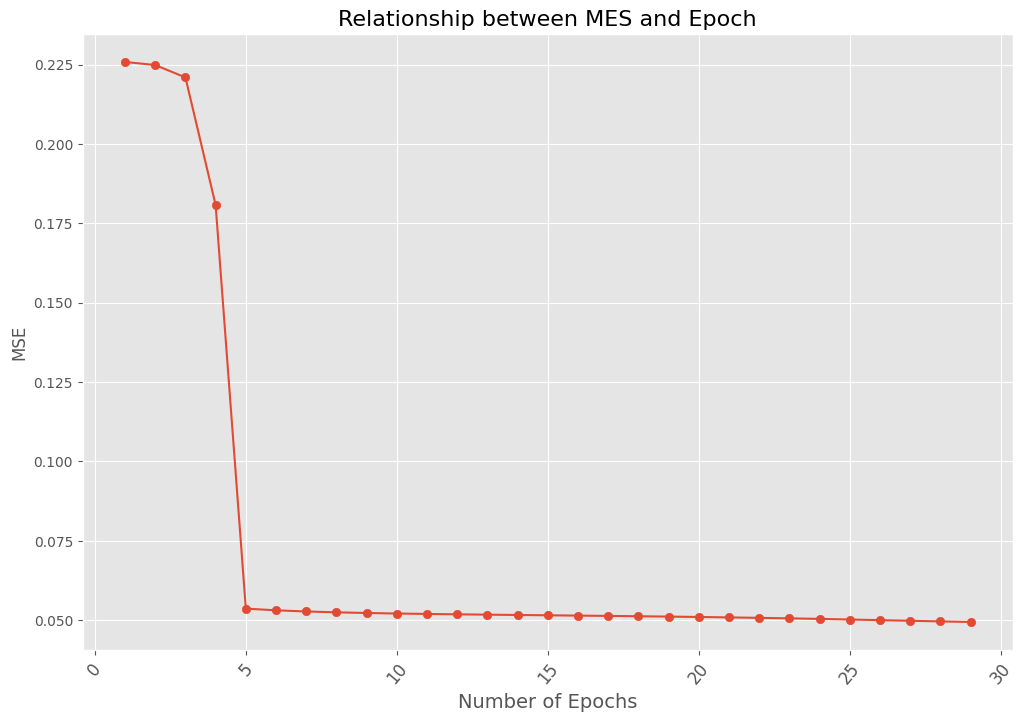

In [45]:
# MSE&NEpoch Plot with Fixed Number of Neuron

def EpochPLOT(min_,max_,steps,NNeurons):
    M=[]
    I=[]
    for i in range(min_,max_,steps):
        M.append(MSE(i,NNeurons))
        I.append(i)
    plt.figure(figsize=(12,8))
    plt.scatter(I,M)
    plt.plot(I,M)
    plt.title("Relationship between MES and Epoch", fontsize=16)
    plt.xlabel("Number of Epochs", fontsize=14)
    plt.ylabel("MSE", fontsize=12)
    plt.xticks(rotation=50, fontsize=12)
    #Save the plots to folder
    plt.savefig("EpochPLOT.png", bbox_inches='tight')
    plt.show()
EpochPLOT(1,30,1,3)

In [46]:
#Inverse Standardization
origin_data = min_max_scaler.inverse_transform(predictions)
print(origin_data)


[[4573.44683293]
 [ 888.65639816]
 [3705.89549472]
 [1043.78413288]
 [3688.52039421]
 [3454.92833685]
 [3380.97857554]
 [1229.59867778]
 [4672.9089323 ]
 [2700.95226152]
 [4110.0744255 ]
 [4340.91710279]
 [4370.33720281]
 [4558.07429226]
 [4423.32168053]
 [4540.44796951]
 [3923.91391275]
 [4574.04043228]
 [2636.32525014]
 [4615.85094818]
 [4579.65910843]
 [3223.35434636]
 [4734.2534117 ]
 [4259.71290059]
 [3492.63924555]
 [3496.79807091]
 [2487.47142997]
 [3545.15584955]
 [4825.75154656]
 [4362.47865679]
 [2952.75048104]
 [4438.59478545]
 [3116.23308074]
 [2290.84033181]
 [3252.7154264 ]
 [4048.89229945]
 [4393.47754179]
 [3585.48770828]
 [4247.65728624]
 [3709.58346212]
 [3921.74356602]
 [4848.59770209]
 [3665.73341991]
 [4383.61110013]
 [4325.6726768 ]
 [4290.20006832]
 [4041.67157353]
 [4089.86981176]
 [4527.54857459]
 [4729.69419207]
 [4386.11004756]
 [2213.96911805]
 [4331.32243809]
 [1661.91384153]
 [4233.3825616 ]
 [4624.22322867]
 [4400.40584752]
 [4555.32443041]
 [4407.2635372